* value_counts
* sort_values
* rank
* sort index
* set index
* rename index -> rename
* reset index
* unique & nunique
* isnull/notnull/hasnans
* dropna
* fillna
* drop_duplicates
* drop
* apply
* isin
* corr
* nlargest -> nsmallest
* insert
* copy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## `value_counts`
* applicable on both series and dataframe
* it gives us the frequency count of each unique value

In [2]:
a = pd.Series([1,1,1,2,2,3])
a.value_counts()

1    3
2    2
3    1
dtype: int64

In [3]:
marks = pd.DataFrame([[100,80,10],[90,70,7],[120,100,14],[80,70,14],[80,70,14]],
                     columns=['iq','marks','package'])
marks

,iq,marks,package
0,100,80,10
1,90,70,7
2,120,100,14
3,80,70,14
4,80,70,14


In [4]:
print(marks.value_counts())
'''here it shows that how many time rows has been repeated.
value_counts() is more useful in series case scenario.'''

iq   marks  package
80   70     14         2
90   70     7          1
100  80     10         1
120  100    14         1
dtype: int64


'here it shows that how many time rows has been repeated.\nvalue_counts() is more useful in series case scenario.'

In [5]:
ipl = pd.read_csv("ipl-matches.csv")
ipl.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


>* **find which player has won most potm -> in finals and qualifiers**

In [6]:
print(ipl['MatchNumber'])
'''here in result we will get the match number and also,
if match is final or any qualifier match.'''

0            Final
1      Qualifier 2
2       Eliminator
3      Qualifier 1
4               70
          ...     
945              4
946              5
947              3
948              2
949              1
Name: MatchNumber, Length: 950, dtype: object


'here in result we will get the match number and also,\nif match is final or any qualifier match.'

In [7]:
ipl['MatchNumber'].str.isdigit()
# here we will get the boolean series
# in that values with numbers will be true.

0      False
1      False
2      False
3      False
4       True
       ...  
945     True
946     True
947     True
948     True
949     True
Name: MatchNumber, Length: 950, dtype: bool

In [8]:
~ipl['MatchNumber'].str.isdigit()
# to get the true for finals and qualifiers we use ~ (not operator)

0       True
1       True
2       True
3       True
4      False
       ...  
945    False
946    False
947    False
948    False
949    False
Name: MatchNumber, Length: 950, dtype: bool

In [9]:
# now we will do boolean indexing on that
ipl[~ipl['MatchNumber'].str.isdigit()]

# now we will get the matches which are finals and qualifiers

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
74,1254117,Dubai,2021-10-15,2021,Final,Chennai Super Kings,Kolkata Knight Riders,Dubai International Cricket Stadium,Kolkata Knight Riders,field,N,Chennai Super Kings,Runs,27.0,NaN,F du Plessis,"['RD Gaikwad', 'F du Plessis', 'RV Uthappa', '...","['Shubman Gill', 'VR Iyer', 'N Rana', 'SP Nari...",Nitin Menon,RK Illingworth
75,1254116,Sharjah,2021-10-13,2021,Qualifier 2,Delhi Capitals,Kolkata Knight Riders,Sharjah Cricket Stadium,Kolkata Knight Riders,field,N,Kolkata Knight Riders,Wickets,3.0,NaN,VR Iyer,"['PP Shaw', 'S Dhawan', 'MP Stoinis', 'SS Iyer...","['Shubman Gill', 'VR Iyer', 'N Rana', 'RA Trip...",KN Ananthapadmanabhan,MA Gough
76,1254115,Sharjah,2021-10-11,2021,Eliminator,Royal Challengers Bangalore,Kolkata Knight Riders,Sharjah Cricket Stadium,Royal Challengers Bangalore,bat,N,Kolkata Knight Riders,Wickets,4.0,NaN,SP Narine,"['D Padikkal', 'V Kohli', 'KS Bharat', 'GJ Max...","['Shubman Gill', 'VR Iyer', 'RA Tripathi', 'N ...",CB Gaffaney,VK Sharma
77,1254114,Dubai,2021-10-10,2021,Qualifier 1,Delhi Capitals,Chennai Super Kings,Dubai International Cricket Stadium,Chennai Super Kings,field,N,Chennai Super Kings,Wickets,4.0,NaN,RD Gaikwad,"['PP Shaw', 'S Dhawan', 'SS Iyer', 'AR Patel',...","['RD Gaikwad', 'F du Plessis', 'RV Uthappa', '...",Nitin Menon,RK Illingworth
134,1237181,NaN,2020-11-10,2020/21,Final,Delhi Capitals,Mumbai Indians,Dubai International Cricket Stadium,Delhi Capitals,bat,N,Mumbai Indians,Wickets,5.0,NaN,TA Boult,"['MP Stoinis', 'S Dhawan', 'AM Rahane', 'SS Iy...","['RG Sharma', 'Q de Kock', 'SA Yadav', 'Ishan ...",CB Gaffaney,Nitin Menon
135,1237180,Abu Dhabi,2020-11-08,2020/21,Qualifier 2,Delhi Capitals,Sunrisers Hyderabad,Sheikh Zayed Stadium,Delhi Capitals,bat,N,Delhi Capitals,Runs,17.0,NaN,MP Stoinis,"['MP Stoinis', 'S Dhawan', 'SS Iyer', 'SO Hetm...","['PK Garg', 'DA Warner', 'MK Pandey', 'KS Will...",PR Reiffel,S Ravi


In [10]:
ipl[~ipl['MatchNumber'].str.isdigit()]['Player_of_Match']

0              HH Pandya
1             JC Buttler
2             RM Patidar
3              DA Miller
74          F du Plessis
75               VR Iyer
76             SP Narine
77            RD Gaikwad
134             TA Boult
135           MP Stoinis
136        KS Williamson
137            JJ Bumrah
194            JJ Bumrah
195         F du Plessis
196              RR Pant
197             SA Yadav
254            SR Watson
255          Rashid Khan
256           AD Russell
257         F du Plessis
314            KH Pandya
315            KV Sharma
316      NM Coulter-Nile
317    Washington Sundar
373          BCJ Cutting
374            DA Warner
375         MC Henriques
376       AB de Villiers
433            RG Sharma
434              A Nehra
435       AB de Villiers
436           KA Pollard
492            MK Pandey
493             V Sehwag
494             SK Raina
495             UT Yadav
552           KA Pollard
553      Harbhajan Singh
554             BJ Hodge
555           MEK Hussey


In [11]:
# now we will apply the value_counts() on this values
ipl[~ipl['MatchNumber'].str.isdigit()]['Player_of_Match'].value_counts()

KA Pollard           3
F du Plessis         3
SK Raina             3
A Kumble             2
MK Pandey            2
YK Pathan            2
M Vijay              2
JJ Bumrah            2
AB de Villiers       2
SR Watson            2
HH Pandya            1
Harbhajan Singh      1
A Nehra              1
V Sehwag             1
UT Yadav             1
MS Bisla             1
BJ Hodge             1
MEK Hussey           1
MS Dhoni             1
CH Gayle             1
MM Patel             1
DE Bollinger         1
AC Gilchrist         1
RG Sharma            1
DA Warner            1
MC Henriques         1
JC Buttler           1
RM Patidar           1
DA Miller            1
VR Iyer              1
SP Narine            1
RD Gaikwad           1
TA Boult             1
MP Stoinis           1
KS Williamson        1
RR Pant              1
SA Yadav             1
Rashid Khan          1
AD Russell           1
KH Pandya            1
KV Sharma            1
NM Coulter-Nile      1
Washington Sundar    1
BCJ Cutting

>* **Toss Decision Plot**

In [12]:
ipl.head(2)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon


In [13]:
ipl['TossDecision'].value_counts()

field    599
bat      351
Name: TossDecision, dtype: int64

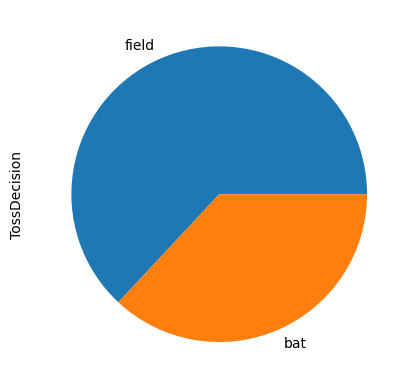

In [14]:
ipl['TossDecision'].value_counts().plot(kind='pie')
plt.show()

>* **How many matches each team has played**

In [15]:
ipl.head(2)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon


In [16]:
ipl['Team1'].value_counts()

Royal Challengers Bangalore    126
Mumbai Indians                 112
Chennai Super Kings            111
Kolkata Knight Riders          105
Kings XI Punjab                 92
Rajasthan Royals                89
Delhi Daredevils                85
Sunrisers Hyderabad             69
Deccan Chargers                 39
Delhi Capitals                  29
Pune Warriors                   23
Punjab Kings                    18
Gujarat Lions                   16
Lucknow Super Giants             8
Gujarat Titans                   7
Rising Pune Supergiant           7
Rising Pune Supergiants          7
Kochi Tuskers Kerala             7
Name: Team1, dtype: int64

In [17]:
'''in Team1 column there will be teams and also in Team2 column
teams will be there,
so we just need to add these two series,
because they have the same index values.'''
ipl['Team1'].value_counts() + ipl['Team2'].value_counts()

Chennai Super Kings            208
Deccan Chargers                 75
Delhi Capitals                  63
Delhi Daredevils               161
Gujarat Lions                   30
Gujarat Titans                  16
Kings XI Punjab                190
Kochi Tuskers Kerala            14
Kolkata Knight Riders          223
Lucknow Super Giants            15
Mumbai Indians                 231
Pune Warriors                   46
Punjab Kings                    28
Rajasthan Royals               192
Rising Pune Supergiant          16
Rising Pune Supergiants         14
Royal Challengers Bangalore    226
Sunrisers Hyderabad            152
dtype: int64

In [18]:
# we can sort the teams in ascending order 
(ipl['Team1'].value_counts() + ipl['Team2'].value_counts()).sort_values(ascending=False)

Mumbai Indians                 231
Royal Challengers Bangalore    226
Kolkata Knight Riders          223
Chennai Super Kings            208
Rajasthan Royals               192
Kings XI Punjab                190
Delhi Daredevils               161
Sunrisers Hyderabad            152
Deccan Chargers                 75
Delhi Capitals                  63
Pune Warriors                   46
Gujarat Lions                   30
Punjab Kings                    28
Gujarat Titans                  16
Rising Pune Supergiant          16
Lucknow Super Giants            15
Kochi Tuskers Kerala            14
Rising Pune Supergiants         14
dtype: int64

## `sort_values()`
* applicable on both series and dataframe
* **Parameters :** ascending -> na_position -> inplace -> multiple cols

In [19]:
x = pd.Series([12,14,1,56,89])
x

0    12
1    14
2     1
3    56
4    89
dtype: int64

In [20]:
print(x.sort_values())
print(x.sort_values(ascending = False))

2     1
0    12
1    14
3    56
4    89
dtype: int64
4    89
3    56
1    14
0    12
2     1
dtype: int64


In [21]:
movies = pd.read_csv("movies.csv")
movies.head(5)

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
1,Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)
2,The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...,The Accidental Prime Minister,The Accidental Prime Minister,0,2019,112,Biography|Drama,6.1,5549,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,NaN,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,NaN,11 January 2019 (USA)
3,Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,0,2019,121,Crime|Drama,6.0,1891,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,NaN,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN,18 January 2019 (USA)
4,Evening Shadows,tt6028796,NaN,https://en.wikipedia.org/wiki/Evening_Shadows,Evening Shadows,Evening Shadows,0,2018,102,Drama,7.3,280,While gay rights and marriage equality has bee...,Under the 'Evening Shadows' truth often plays...,NaN,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,17 wins & 1 nomination,11 January 2019 (India)


In [22]:
movies.sort_values('title_x')

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
1498,16 December (film),tt0313844,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/16_December_(film),16-Dec,16-Dec,0,2002,158,Action|Thriller,6.9,1091,16 December 1971 was the day when India won t...,Indian intelligence agents race against time t...,NaN,Danny Denzongpa|Gulshan Grover|Milind Soman|Di...,2 nominations,22 March 2002 (India)
1021,1920 (film),tt1301698,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/1920_(film),1920,1920,0,2008,138,Horror|Mystery|Romance,6.4,2588,A devotee of Bhagwan Shri Hanuman Arjun Singh...,After forsaking his family and religion a hus...,A Love Made in Heaven...A Revenge Born in Hell...,Rajniesh Duggall|Adah Sharma|Anjori Alagh|Raj ...,NaN,12 September 2008 (India)
287,1920: London,tt5638500,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/1920_London,1920 London,1920 London,0,2016,120,Horror|Mystery,4.1,1373,Shivangi (Meera Chopra) lives in London with h...,After her husband is possessed by an evil spir...,Fear strikes again,Sharman Joshi|Meera Chopra|Vishal Karwal|Suren...,NaN,6 May 2016 (USA)
723,1920: The Evil Returns,tt2222550,https://upload.wikimedia.org/wikipedia/en/e/e7...,https://en.wikipedia.org/wiki/1920:_The_Evil_R...,1920: Evil Returns,1920: Evil Returns,0,2012,124,Drama|Horror|Romance,4.8,1587,This story revolves around a famous poet who m...,This story revolves around a famous poet who m...,Possession is back,Vicky Ahuja|Tia Bajpai|Irma Jämhammar|Sharad K...,NaN,2 November 2012 (India)
1039,1971 (2007 film),tt0983990,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/1971_(2007_film),1971,1971,0,2007,160,Action|Drama|War,7.9,1121,Based on true facts the film revolves around ...,Based on true facts the film revolves around ...,Honor the heroes.......,Manoj Bajpayee|Ravi Kishan|Deepak Dobriyal|,1 win,9 March 2007 (India)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,Zindagi Na Milegi Dobara,tt1562872,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zindagi_Na_Mileg...,Zindagi Na Milegi Dobara,Zindagi Na Milegi Dobara,0,2011,155,Comedy|Drama,8.1,60826,Three friends decide to turn their fantasy vac...,Three friends decide to turn their fantasy vac...,NaN,Hrithik Roshan|Farhan Akhtar|Abhay Deol|Katrin...,30 wins & 22 nominations,15 July 2011 (India)
670,Zindagi Tere Naam,tt2164702,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zindagi_Tere_Naam,Zindagi Tere Naam,Zindagi Tere Naam,0,2012,120,Romance,4.7,27,Mr. Singh an elderly gentleman relates to hi...,Mr. Singh an elderly gentleman relates to hi...,NaN,Mithun Chakraborty|Ranjeeta Kaur|Priyanka Meht...,1 win,16 March 2012 (India)
756,Zokkomon,tt1605790,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zokkomon,Zokkomon,Zokkomon,0,2011,109,Action|Adventure,4.0,274,After the passing of his parents in an acciden...,An orphan is abused and abandoned believed to...,Betrayal. Friendship. Bravery.,Darsheel Safary|Anupam Kher|Manjari Fadnnis|Ti...,NaN,22 April 2011 (India)
939,Zor Lagaa Ke...Haiya!,tt1479857,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zor_Lagaa_Ke...H...,Zor Lagaa Ke... Haiya!,Zor Lagaa Ke... Haiya!,0,2009,\N,Comedy|Drama|Family,6.4,46,A tree narrates the story of four Mumbai-based...,Children build a tree-house to spy on a beggar...,NaN,Meghan Jadhav|Mithun Chakraborty|Riya Sen|Seem...,NaN,NaN


In [23]:
movies.sort_values('title_x', ascending = False)
# to get in the descending order

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
1623,Zubeidaa,tt0255713,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zubeidaa,Zubeidaa,Zubeidaa,0,2001,153,Biography|Drama|History,6.2,1384,The film begins with Riyaz (Rajat Kapoor) Zub...,Zubeidaa an aspiring Muslim actress marries ...,The Story of a Princess,Karisma Kapoor|Rekha|Manoj Bajpayee|Rajit Kapo...,3 wins & 13 nominations,19 January 2001 (India)
939,Zor Lagaa Ke...Haiya!,tt1479857,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zor_Lagaa_Ke...H...,Zor Lagaa Ke... Haiya!,Zor Lagaa Ke... Haiya!,0,2009,\N,Comedy|Drama|Family,6.4,46,A tree narrates the story of four Mumbai-based...,Children build a tree-house to spy on a beggar...,NaN,Meghan Jadhav|Mithun Chakraborty|Riya Sen|Seem...,NaN,NaN
756,Zokkomon,tt1605790,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zokkomon,Zokkomon,Zokkomon,0,2011,109,Action|Adventure,4.0,274,After the passing of his parents in an acciden...,An orphan is abused and abandoned believed to...,Betrayal. Friendship. Bravery.,Darsheel Safary|Anupam Kher|Manjari Fadnnis|Ti...,NaN,22 April 2011 (India)
670,Zindagi Tere Naam,tt2164702,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zindagi_Tere_Naam,Zindagi Tere Naam,Zindagi Tere Naam,0,2012,120,Romance,4.7,27,Mr. Singh an elderly gentleman relates to hi...,Mr. Singh an elderly gentleman relates to hi...,NaN,Mithun Chakraborty|Ranjeeta Kaur|Priyanka Meht...,1 win,16 March 2012 (India)
778,Zindagi Na Milegi Dobara,tt1562872,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zindagi_Na_Mileg...,Zindagi Na Milegi Dobara,Zindagi Na Milegi Dobara,0,2011,155,Comedy|Drama,8.1,60826,Three friends decide to turn their fantasy vac...,Three friends decide to turn their fantasy vac...,NaN,Hrithik Roshan|Farhan Akhtar|Abhay Deol|Katrin...,30 wins & 22 nominations,15 July 2011 (India)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,1971 (2007 film),tt0983990,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/1971_(2007_film),1971,1971,0,2007,160,Action|Drama|War,7.9,1121,Based on true facts the film revolves around ...,Based on true facts the film revolves around ...,Honor the heroes.......,Manoj Bajpayee|Ravi Kishan|Deepak Dobriyal|,1 win,9 March 2007 (India)
723,1920: The Evil Returns,tt2222550,https://upload.wikimedia.org/wikipedia/en/e/e7...,https://en.wikipedia.org/wiki/1920:_The_Evil_R...,1920: Evil Returns,1920: Evil Returns,0,2012,124,Drama|Horror|Romance,4.8,1587,This story revolves around a famous poet who m...,This story revolves around a famous poet who m...,Possession is back,Vicky Ahuja|Tia Bajpai|Irma Jämhammar|Sharad K...,NaN,2 November 2012 (India)
287,1920: London,tt5638500,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/1920_London,1920 London,1920 London,0,2016,120,Horror|Mystery,4.1,1373,Shivangi (Meera Chopra) lives in London with h...,After her husband is possessed by an evil spir...,Fear strikes again,Sharman Joshi|Meera Chopra|Vishal Karwal|Suren...,NaN,6 May 2016 (USA)
1021,1920 (film),tt1301698,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/1920_(film),1920,1920,0,2008,138,Horror|Mystery|Romance,6.4,2588,A devotee of Bhagwan Shri Hanuman Arjun Singh...,After forsaking his family and religion a hus...,A Love Made in Heaven...A Revenge Born in Hell...,Rajniesh Duggall|Adah Sharma|Anjori Alagh|Raj ...,NaN,12 September 2008 (India)


In [24]:
students = pd.DataFrame(
    {
        'name':['nitish','ankit','rupesh',np.nan,'mrityunjay',
                np.nan,'rishabh',np.nan,'aditya',np.nan],
        'college':['bit','iit','vit',np.nan,np.nan,'vlsi','ssit',
                   np.nan,np.nan,'git'],
        'branch':['eee','it','cse',np.nan,'me','ce','civ','cse',
                  'bio',np.nan],
        'cgpa':[6.66,8.25,6.41,np.nan,5.6,9.0,7.4,10,7.4,np.nan],
        'package':[4,5,6,np.nan,6,7,8,9,np.nan,np.nan]
    }
)

students

,name,college,branch,cgpa,package
0,nitish,bit,eee,6.66,4.0
1,ankit,iit,it,8.25,5.0
2,rupesh,vit,cse,6.41,6.0
3,NaN,NaN,NaN,NaN,NaN
4,mrityunjay,NaN,me,5.60,6.0
5,NaN,vlsi,ce,9.00,7.0
6,rishabh,ssit,civ,7.40,8.0
7,NaN,NaN,cse,10.00,9.0
8,aditya,NaN,bio,7.40,NaN
9,NaN,git,NaN,NaN,NaN


In [25]:
# what happens when we apply sort_values() on missing values
students.sort_values('name')

,name,college,branch,cgpa,package
8,aditya,NaN,bio,7.40,NaN
1,ankit,iit,it,8.25,5.0
4,mrityunjay,NaN,me,5.60,6.0
0,nitish,bit,eee,6.66,4.0
6,rishabh,ssit,civ,7.40,8.0
2,rupesh,vit,cse,6.41,6.0
3,NaN,NaN,NaN,NaN,NaN
5,NaN,vlsi,ce,9.00,7.0
7,NaN,NaN,cse,10.00,9.0
9,NaN,git,NaN,NaN,NaN


In [26]:
'''there is one paramere named na_position,
this will help us to get the missing values on top''' 
students.sort_values('name', na_position = 'first')

,name,college,branch,cgpa,package
3,NaN,NaN,NaN,NaN,NaN
5,NaN,vlsi,ce,9.00,7.0
7,NaN,NaN,cse,10.00,9.0
9,NaN,git,NaN,NaN,NaN
8,aditya,NaN,bio,7.40,NaN
1,ankit,iit,it,8.25,5.0
4,mrityunjay,NaN,me,5.60,6.0
0,nitish,bit,eee,6.66,4.0
6,rishabh,ssit,civ,7.40,8.0
2,rupesh,vit,cse,6.41,6.0


In [27]:
students.sort_values('name', na_position = 'first', ascending = False)

,name,college,branch,cgpa,package
3,NaN,NaN,NaN,NaN,NaN
5,NaN,vlsi,ce,9.00,7.0
7,NaN,NaN,cse,10.00,9.0
9,NaN,git,NaN,NaN,NaN
2,rupesh,vit,cse,6.41,6.0
6,rishabh,ssit,civ,7.40,8.0
0,nitish,bit,eee,6.66,4.0
4,mrityunjay,NaN,me,5.60,6.0
1,ankit,iit,it,8.25,5.0
8,aditya,NaN,bio,7.40,NaN


* **Note:** sort_values() will create temporary DataFrame. It is not permanent operation. To make permanent changes we can use inplace=True parameter'''

>* **sort_values() on multiple columns**

In [28]:
movies.head(2)

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
1,Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)


In [29]:
'''first we want to sort movies by their release year,
then we want to sort them alphabetically for each year.'''
movies.sort_values(['year_of_release','title_y'])

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
1575,Aalavandhan,tt0294264,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Aalavandhan,Aalavandhan,Aalavandhan,0,2001,177,Action|Thriller,7.1,1746,The story follows Abhay (Haasan) who has a dis...,A psychopath tries to protect his twin brother...,The Fearless,Kamal Haasan|Raveena Tandon|Manisha Koirala|Ki...,1 win & 1 nomination,16 November 2001 (India)
1576,Aamdani Atthanni Kharcha Rupaiya,tt0305173,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Aamdani_Atthanni...,Aamdani Atthanni Kharcha Rupaiya,Aamdani Atthanni Kharcha Rupaiya,0,2001,150,Comedy|Drama|Family,4.7,1026,Jhoomri and her husband Bhimsha move into a ...,In order to make ends meet three women steps ...,NaN,Govinda|Juhi Chawla|Tabu|Chandrachur Singh|Joh...,1 nomination,21 December 2001 (India)
1577,Aashiq (2001 film),tt0273406,https://upload.wikimedia.org/wikipedia/en/c/c6...,https://en.wikipedia.org/wiki/Aashiq_(2001_film),Aashiq,Aashiq,0,2001,160,Action|Drama|Romance,3.8,357,Pooja and Chander Kapoor have a heart-to-heart...,Pooja and Chander Kapoor have a heart-to-heart...,NaN,Bobby Deol|Karisma Kapoor|,NaN,26 January 2001 (India)
1579,Ajnabee (2001 film),tt0278291,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Ajnabee_(2001_film),Ajnabee,Ajnabee,0,2001,165,Action|Crime|Drama,6.3,7480,A new couple get married and move to Switzerla...,Bobby Deol and Kareena Kapoor play a new coupl...,Trust no one,Akshay Kumar|Bobby Deol|Kareena Kapoor|Bipasha...,3 wins & 9 nominations,21 September 2001 (India)
1578,Aks (2001 film),tt0289845,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Aks_(2001_film),Aks,Aks,0,2001,184,Action|Crime|Horror,5.9,1518,Aks is the story of a hunter and his prey. A c...,Raghavan Ghatge a psychotic terrorist and Ma...,There is a stranger in your mirror,Amitabh Bachchan|Raveena Tandon|Manoj Bajpayee...,9 wins & 14 nominations,13 July 2001 (India)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,Total Dhamaal,tt7639372,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Total_Dhamaal,Total Dhamaal,Total Dhamaal,0,2019,130,Action|Adventure|Comedy,4.3,4817,Total Dhamaal is the third instalment in the D...,A group of people learn about a hidden treasur...,The Wildest Adventure Ever,Ajay Devgn|Madhuri Dixit|Anil Kapoor|Riteish D...,NaN,22 February 2019 (India)
64,Ujda Chaman,tt11046300,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Ujda_Chaman,Ujda Chaman,Ujda Chaman,0,2019,120,Comedy,8.1,1440,Ujda Chaman is about a 30 -year-old bachelor C...,Ujda Chaman is about a 30 -year-old bachelor C...,NaN,Sunny Singh Nijjar|Maanvi Gagroo|Saurabh Shukl...,NaN,1 November 2019 (USA)
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
3,Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,0,2019,121,Crime|Drama,6.0,1891,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,NaN,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN,18 January 2019 (USA)


In [30]:
'''suppose we want to sort movies in ascending order by release year,
and alphabetically it should be in descending order.'''
movies.sort_values(['year_of_release','title_y'], ascending=[True,False])

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
1623,Zubeidaa,tt0255713,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zubeidaa,Zubeidaa,Zubeidaa,0,2001,153,Biography|Drama|History,6.2,1384,The film begins with Riyaz (Rajat Kapoor) Zub...,Zubeidaa an aspiring Muslim actress marries ...,The Story of a Princess,Karisma Kapoor|Rekha|Manoj Bajpayee|Rajit Kapo...,3 wins & 13 nominations,19 January 2001 (India)
1625,Yeh Zindagi Ka Safar,tt0298607,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Zindagi_Ka_S...,Yeh Zindagi Ka Safar,Yeh Zindagi Ka Safar,0,2001,146,Drama,3.0,133,Hindi pop-star Sarina Devan lives a wealthy ...,A singer finds out she was adopted when the ed...,NaN,Ameesha Patel|Jimmy Sheirgill|Nafisa Ali|Gulsh...,NaN,16 November 2001 (India)
1622,Yeh Teraa Ghar Yeh Meraa Ghar,tt0298606,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Teraa_Ghar_Y...,Yeh Teraa Ghar Yeh Meraa Ghar,Yeh Teraa Ghar Yeh Meraa Ghar,0,2001,175,Comedy|Drama,5.7,704,In debt; Dayashankar Pandey is forced to go to...,In debt; Dayashankar Pandey is forced to go to...,NaN,Sunil Shetty|Mahima Chaudhry|Paresh Rawal|Saur...,1 nomination,12 October 2001 (India)
1620,Yeh Raaste Hain Pyaar Ke,tt0292740,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Raaste_Hain_...,Yeh Raaste Hain Pyaar Ke,Yeh Raaste Hain Pyaar Ke,0,2001,149,Drama|Romance,4.0,607,Two con artistes and car thieves Vicky (Ajay ...,Two con artistes and car thieves Vicky (Ajay ...,Love is a journey... not a destination,Ajay Devgn|Madhuri Dixit|Preity Zinta|Vikram G...,NaN,10 August 2001 (India)
1573,Yaadein (2001 film),tt0248617,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yaadein_(2001_film),Yaadein...,Yaadein...,0,2001,171,Drama|Musical|Romance,4.4,3034,Raj Singh Puri is best friends with L.K. Malho...,Raj Singh Puri is best friends with L.K. Malho...,memories to cherish...,Jackie Shroff|Hrithik Roshan|Kareena Kapoor|Am...,1 nomination,27 June 2001 (India)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,Arjun Patiala,tt7881524,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Arjun_Patiala,Arjun Patiala,Arjun Patiala,0,2019,107,Action|Comedy,4.1,676,Arjun Patiala(Diljit Dosanjh)has recently been...,This spoof comedy narrates the story of a cop ...,NaN,Diljit Dosanjh|Kriti Sanon|Varun Sharma|Ronit ...,NaN,26 July 2019 (USA)
10,Amavas,tt8396186,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Amavas,Amavas,Amavas,0,2019,134,Horror|Thriller,2.8,235,Far away from the bustle of the city a young ...,The lives of a couple turn into a nightmare a...,NaN,Ali Asgar|Vivan Bhatena|Nargis Fakhri|Sachiin ...,NaN,8 February 2019 (India)
26,Albert Pinto Ko Gussa Kyun Aata Hai?,tt4355838,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Albert_Pinto_Ko_...,Albert Pinto Ko Gussa Kyun Aata Hai?,Albert Pinto Ko Gussa Kyun Aata Hai?,0,2019,100,Drama,4.8,56,Albert leaves his house one morning without te...,Albert Pinto goes missing one day and his girl...,NaN,Manav Kaul|Nandita Das|,NaN,12 April 2019 (India)
21,22 Yards,tt9496212,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/22_Yards,22 Yards,22 Yards,0,2019,126,Sport,5.3,124,A dramatic portrayal of a victorious tale of a...,A dramatic portrayal of a victorious tale of a...,NaN,Barun Sobti|Rajit Kapur|Panchhi Bora|Kartikey ...,NaN,15 March 2019 (India)


## `rank`
* applicable on series.

In [31]:
batsman = pd.read_csv('batsman_runs_ipl.csv')
batsman

,batter,batsman_run
0,A Ashish Reddy,280
1,A Badoni,161
2,A Chandila,4
3,A Chopra,53
4,A Choudhary,25
...,...,...
600,Yash Dayal,0
601,Yashpal Singh,47
602,Younis Khan,3
603,Yuvraj Singh,2754


In [32]:
'''on the basis of run scored by the each batsman
we will assign the rank to each batsman in the given series'''
batsman['batsman_run'].rank(ascending=False)

0      166.5
1      226.0
2      535.0
3      329.0
4      402.5
       ...  
600    594.0
601    343.0
602    547.5
603     27.0
604    256.0
Name: batsman_run, Length: 605, dtype: float64

In [33]:
batsman['batting_rank'] = batsman['batsman_run'].rank(ascending=False)
# this will perform permanent changes and create new column

In [34]:
batsman

,batter,batsman_run,batting_rank
0,A Ashish Reddy,280,166.5
1,A Badoni,161,226.0
2,A Chandila,4,535.0
3,A Chopra,53,329.0
4,A Choudhary,25,402.5
...,...,...,...
600,Yash Dayal,0,594.0
601,Yashpal Singh,47,343.0
602,Younis Khan,3,547.5
603,Yuvraj Singh,2754,27.0


In [35]:
batsman.sort_values('batting_rank')

,batter,batsman_run,batting_rank
569,V Kohli,6634,1.0
462,S Dhawan,6244,2.0
130,DA Warner,5883,3.0
430,RG Sharma,5881,4.0
493,SK Raina,5536,5.0
...,...,...,...
512,SS Cottrell,0,594.0
466,S Kaushik,0,594.0
203,IC Pandey,0,594.0
467,S Ladda,0,594.0


## `sort_index()`
* applicable on both series and dataframes

In [36]:
marks_series = pd.Series({'maths':67,'english':57,
                         'science':89,'hindi':100 })
marks_series

maths       67
english     57
science     89
hindi      100
dtype: int64

In [37]:
marks_series.sort_index(ascending=False)

science     89
maths       67
hindi      100
english     57
dtype: int64

In [38]:
movies.head(2)

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
1,Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)


In [39]:
movies.sort_index(ascending=False)

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
1628,Humsafar,tt2403201,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Humsafar,Humsafar,Humsafar,0,2011,35,Drama|Romance,9.0,2968,Sara and Ashar are childhood friends who share...,Ashar and Khirad are forced to get married due...,NaN,Fawad Khan|,NaN,TV Series (2011–2012)
1627,Daaka,tt10833860,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Daaka,Daaka,Daaka,0,2019,136,Action,7.4,38,Shinda tries robbing a bank so he can be wealt...,Shinda tries robbing a bank so he can be wealt...,NaN,Gippy Grewal|Zareen Khan|,NaN,1 November 2019 (USA)
1626,Sabse Bada Sukh,tt0069204,NaN,https://en.wikipedia.org/wiki/Sabse_Bada_Sukh,Sabse Bada Sukh,Sabse Bada Sukh,0,2018,\N,Comedy|Drama,6.1,13,Village born Lalloo re-locates to Bombay and ...,Village born Lalloo re-locates to Bombay and ...,NaN,Vijay Arora|Asrani|Rajni Bala|Kumud Damle|Utpa...,NaN,NaN
1625,Yeh Zindagi Ka Safar,tt0298607,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Zindagi_Ka_S...,Yeh Zindagi Ka Safar,Yeh Zindagi Ka Safar,0,2001,146,Drama,3.0,133,Hindi pop-star Sarina Devan lives a wealthy ...,A singer finds out she was adopted when the ed...,NaN,Ameesha Patel|Jimmy Sheirgill|Nafisa Ali|Gulsh...,NaN,16 November 2001 (India)
1624,Tera Mera Saath Rahen,tt0301250,https://upload.wikimedia.org/wikipedia/en/2/2b...,https://en.wikipedia.org/wiki/Tera_Mera_Saath_...,Tera Mera Saath Rahen,Tera Mera Saath Rahen,0,2001,148,Drama,4.9,278,Raj Dixit lives with his younger brother Rahu...,A man is torn between his handicapped brother ...,NaN,Ajay Devgn|Sonali Bendre|Namrata Shirodkar|Pre...,NaN,7 November 2001 (India)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,Evening Shadows,tt6028796,NaN,https://en.wikipedia.org/wiki/Evening_Shadows,Evening Shadows,Evening Shadows,0,2018,102,Drama,7.3,280,While gay rights and marriage equality has bee...,Under the 'Evening Shadows' truth often plays...,NaN,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,17 wins & 1 nomination,11 January 2019 (India)
3,Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,0,2019,121,Crime|Drama,6.0,1891,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,NaN,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN,18 January 2019 (USA)
2,The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...,The Accidental Prime Minister,The Accidental Prime Minister,0,2019,112,Biography|Drama,6.1,5549,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,NaN,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,NaN,11 January 2019 (USA)
1,Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)


## `set_index()`
* applicable on DataFrame 
* **parameter :** inplace

In [40]:
batsman.head()

,batter,batsman_run,batting_rank
0,A Ashish Reddy,280,166.5
1,A Badoni,161,226.0
2,A Chandila,4,535.0
3,A Chopra,53,329.0
4,A Choudhary,25,402.5


In [41]:
batsman.set_index('batter')
# this is temporary operation
# to make it permanent we can use inplace=True parameter

,batsman_run,batting_rank
batter,,
A Ashish Reddy,280,166.5
A Badoni,161,226.0
A Chandila,4,535.0
A Chopra,53,329.0
A Choudhary,25,402.5
...,...,...
Yash Dayal,0,594.0
Yashpal Singh,47,343.0
Younis Khan,3,547.5


In [42]:
batsman.set_index('batter', inplace=True)
# now permanent changes will be done

In [43]:
batsman

,batsman_run,batting_rank
batter,,
A Ashish Reddy,280,166.5
A Badoni,161,226.0
A Chandila,4,535.0
A Chopra,53,329.0
A Choudhary,25,402.5
...,...,...
Yash Dayal,0,594.0
Yashpal Singh,47,343.0
Younis Khan,3,547.5


## `reset_index()`
* applicable on both series and dataframe
* **parameter :** drop 

In [44]:
batsman.reset_index()
# to make permanenr changes we can use inplace= True parameter

,batter,batsman_run,batting_rank
0,A Ashish Reddy,280,166.5
1,A Badoni,161,226.0
2,A Chandila,4,535.0
3,A Chopra,53,329.0
4,A Choudhary,25,402.5
...,...,...,...
600,Yash Dayal,0,594.0
601,Yashpal Singh,47,343.0
602,Younis Khan,3,547.5
603,Yuvraj Singh,2754,27.0


In [45]:
'''suppose we want to make batting_rank column as index 
instead of batter column
if we use the set_index() function then 
we will loose the existing indexcolumn'''
batsman.set_index('batting_rank')

,batsman_run
batting_rank,
166.5,280
226.0,161
535.0,4
329.0,53
402.5,25
...,...
594.0,0
343.0,47
547.5,3


In [46]:
'''if we want to change the index column without loosing the
existing information then we will use reset_index() first
then we will apply the set_index() function'''
batsman.reset_index().set_index('batting_rank')

,batter,batsman_run
batting_rank,,
166.5,A Ashish Reddy,280
226.0,A Badoni,161
535.0,A Chandila,4
329.0,A Chopra,53
402.5,A Choudhary,25
...,...,...
594.0,Yash Dayal,0
343.0,Yashpal Singh,47
547.5,Younis Khan,3


>* **Series to DataFrame using reset_index()**

In [47]:
marks_series = pd.Series({'maths':67,'english':57,
                         'science':89,'hindi':100 })
marks_series

maths       67
english     57
science     89
hindi      100
dtype: int64

In [48]:
marks_series.reset_index()
# this output is DataFrame datatype

,index,0
0,maths,67
1,english,57
2,science,89
3,hindi,100


## `rename()`
* applicable on DataFrame
* **Parameter :** index

In [49]:
movies.head(1)

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)


In [50]:
movies.set_index('title_x',inplace=True)

In [51]:
movies.head(2)

,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
title_x,,,,,,,,,,,,,,,,,
Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)


>* **changing name of existing column**

In [52]:
movies.rename(columns={'imdb_id':'imdb','poster_path':'link'}, inplace=True)

In [53]:
movies.head(2)

,imdb,link,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
title_x,,,,,,,,,,,,,,,,,
Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)


>* **we can even change name of the index also**

In [54]:
movies.rename(index={'Uri: The Surgical Strike':'Uri','Battalion 609':'Battalion'},inplace=True)

In [55]:
movies.head(2)

,imdb,link,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
title_x,,,,,,,,,,,,,,,,,
Uri,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
Battalion,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)


## `unique()`
* applicable on Series
* it will extract all the unique values from the particular series

In [56]:
temp = pd.Series([1,1,2,2,3,3,4,4,5,5,np.nan,np.nan])
temp

0     1.0
1     1.0
2     2.0
3     2.0
4     3.0
5     3.0
6     4.0
7     4.0
8     5.0
9     5.0
10    NaN
11    NaN
dtype: float64

In [57]:
temp.unique()

array([ 1.,  2.,  3.,  4.,  5., nan])

In [58]:
ipl.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


>* **we want the number of seasons happened so far in ipl

In [59]:
ipl['Season'].unique()

array(['2022', '2021', '2020/21', '2019', '2018', '2017', '2016', '2015',
       '2014', '2013', '2012', '2011', '2009/10', '2009', '2007/08'],
      dtype=object)

>* **suppose we want total number of unique values**

In [60]:
len(ipl['Season'].unique())

15

## `nunique()`
* applicable on both Series and DataFrame
* **Parameter :** dropna
* it will not count nan (missing values) values

In [61]:
ipl.head(2)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon


In [62]:
ipl['Season'].nunique()
# it will directly gives the number of unique values 

15

In [63]:
temp = pd.Series([1,1,2,2,3,3,4,4,5,5,np.nan,np.nan])
print(temp)
# it will not count nan (missing values) values
print("number of unique values are :",temp.nunique())

0     1.0
1     1.0
2     2.0
3     2.0
4     3.0
5     3.0
6     4.0
7     4.0
8     5.0
9     5.0
10    NaN
11    NaN
dtype: float64
number of unique values are : 5


## `isnull()`
* applicable on both Series and DataFrame

In [64]:
students

,name,college,branch,cgpa,package
0,nitish,bit,eee,6.66,4.0
1,ankit,iit,it,8.25,5.0
2,rupesh,vit,cse,6.41,6.0
3,NaN,NaN,NaN,NaN,NaN
4,mrityunjay,NaN,me,5.60,6.0
5,NaN,vlsi,ce,9.00,7.0
6,rishabh,ssit,civ,7.40,8.0
7,NaN,NaN,cse,10.00,9.0
8,aditya,NaN,bio,7.40,NaN
9,NaN,git,NaN,NaN,NaN


In [65]:
students['name'].isnull()

0    False
1    False
2    False
3     True
4    False
5     True
6    False
7     True
8    False
9     True
Name: name, dtype: bool

In [66]:
students['name'][students['name'].isnull()]

3    NaN
5    NaN
7    NaN
9    NaN
Name: name, dtype: object

In [67]:
students.isnull()

,name,college,branch,cgpa,package
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,True,True,True,True,True
4,False,True,False,False,False
5,True,False,False,False,False
6,False,False,False,False,False
7,True,True,False,False,False
8,False,True,False,False,True
9,True,False,True,True,True


## `notnull()`
* applicable on both Series and DataFrame
* isnull() and notnull() are complementary to each other

In [68]:
students['name'].notnull()

0     True
1     True
2     True
3    False
4     True
5    False
6     True
7    False
8     True
9    False
Name: name, dtype: bool

In [69]:
students['name'][students['name'].notnull()]

0        nitish
1         ankit
2        rupesh
4    mrityunjay
6       rishabh
8        aditya
Name: name, dtype: object

In [70]:
students.notnull()

,name,college,branch,cgpa,package
0,True,True,True,True,True
1,True,True,True,True,True
2,True,True,True,True,True
3,False,False,False,False,False
4,True,False,True,True,True
5,False,True,True,True,True
6,True,True,True,True,True
7,False,False,True,True,True
8,True,False,True,True,False
9,False,True,False,False,False


## `hasnans`
* applicable on Series 

In [71]:
students['name'].hasnans

True

## `dropna`
* applicable on both Series and DataFrame
* **Parameter :** how -> subset 

In [72]:
students['name']

0        nitish
1         ankit
2        rupesh
3           NaN
4    mrityunjay
5           NaN
6       rishabh
7           NaN
8        aditya
9           NaN
Name: name, dtype: object

In [73]:
students['name'].dropna()

0        nitish
1         ankit
2        rupesh
4    mrityunjay
6       rishabh
8        aditya
Name: name, dtype: object

In [74]:
'''if we apply dropna on DataFrame then,
if missing value is present in any of the row,
then it will remove that whole row from DataFrame.
this is default behaviour of dropna()'''
students.dropna()

,name,college,branch,cgpa,package
0,nitish,bit,eee,6.66,4.0
1,ankit,iit,it,8.25,5.0
2,rupesh,vit,cse,6.41,6.0
6,rishabh,ssit,civ,7.40,8.0


In [75]:
'''suppose we want to remove only those rows,
which has missing values in all the columns,
,means the entire row is having missing values.'''
students.dropna(how='all')

,name,college,branch,cgpa,package
0,nitish,bit,eee,6.66,4.0
1,ankit,iit,it,8.25,5.0
2,rupesh,vit,cse,6.41,6.0
4,mrityunjay,NaN,me,5.60,6.0
5,NaN,vlsi,ce,9.00,7.0
6,rishabh,ssit,civ,7.40,8.0
7,NaN,NaN,cse,10.00,9.0
8,aditya,NaN,bio,7.40,NaN
9,NaN,git,NaN,NaN,NaN


In [76]:
'''suppose we want to remove only those missing values,
which are available in name column.'''
students.dropna(subset='name')

,name,college,branch,cgpa,package
0,nitish,bit,eee,6.66,4.0
1,ankit,iit,it,8.25,5.0
2,rupesh,vit,cse,6.41,6.0
4,mrityunjay,NaN,me,5.60,6.0
6,rishabh,ssit,civ,7.40,8.0
8,aditya,NaN,bio,7.40,NaN


In [77]:
'''we can remove rows base on two or more columns.
suppose we want to remove if missing values is present
either in name column or college column.'''
students.dropna(subset=['name','college'])

,name,college,branch,cgpa,package
0,nitish,bit,eee,6.66,4.0
1,ankit,iit,it,8.25,5.0
2,rupesh,vit,cse,6.41,6.0
6,rishabh,ssit,civ,7.40,8.0


In [78]:
# above all changes are not permanent
students

,name,college,branch,cgpa,package
0,nitish,bit,eee,6.66,4.0
1,ankit,iit,it,8.25,5.0
2,rupesh,vit,cse,6.41,6.0
3,NaN,NaN,NaN,NaN,NaN
4,mrityunjay,NaN,me,5.60,6.0
5,NaN,vlsi,ce,9.00,7.0
6,rishabh,ssit,civ,7.40,8.0
7,NaN,NaN,cse,10.00,9.0
8,aditya,NaN,bio,7.40,NaN
9,NaN,git,NaN,NaN,NaN


## `fillna()`
* applicable on both Series and DataFrame
* **Parameter:** method

In [79]:
students

,name,college,branch,cgpa,package
0,nitish,bit,eee,6.66,4.0
1,ankit,iit,it,8.25,5.0
2,rupesh,vit,cse,6.41,6.0
3,NaN,NaN,NaN,NaN,NaN
4,mrityunjay,NaN,me,5.60,6.0
5,NaN,vlsi,ce,9.00,7.0
6,rishabh,ssit,civ,7.40,8.0
7,NaN,NaN,cse,10.00,9.0
8,aditya,NaN,bio,7.40,NaN
9,NaN,git,NaN,NaN,NaN


In [80]:
students['name'].fillna('unknown')

0        nitish
1         ankit
2        rupesh
3       unknown
4    mrityunjay
5       unknown
6       rishabh
7       unknown
8        aditya
9       unknown
Name: name, dtype: object

In [81]:
students['name'].fillna('unknown').hasnans
# no missing value present in the Data

False

In [82]:
students.fillna(0)
# this is not a good idea
# you should do it colulmn by column bases

,name,college,branch,cgpa,package
0,nitish,bit,eee,6.66,4.0
1,ankit,iit,it,8.25,5.0
2,rupesh,vit,cse,6.41,6.0
3,0,0,0,0.00,0.0
4,mrityunjay,0,me,5.60,6.0
5,0,vlsi,ce,9.00,7.0
6,rishabh,ssit,civ,7.40,8.0
7,0,0,cse,10.00,9.0
8,aditya,0,bio,7.40,0.0
9,0,git,0,0.00,0.0


In [83]:
students['package'].fillna(students['package'].mean())
# we replaced missing values in package column by mean value.

0    4.000000
1    5.000000
2    6.000000
3    6.428571
4    6.000000
5    7.000000
6    8.000000
7    9.000000
8    6.428571
9    6.428571
Name: package, dtype: float64

In [84]:
students['name'].fillna(method='ffill')
# ffill stand for forward fill

0        nitish
1         ankit
2        rupesh
3        rupesh
4    mrityunjay
5    mrityunjay
6       rishabh
7       rishabh
8        aditya
9        aditya
Name: name, dtype: object

In [85]:
students['name'].fillna(method='bfill')

0        nitish
1         ankit
2        rupesh
3    mrityunjay
4    mrityunjay
5       rishabh
6       rishabh
7        aditya
8        aditya
9           NaN
Name: name, dtype: object

## `drop_duplicates()`
* applicable on both Series and DataFrame
* **Parameter:** keep

In [86]:
temp = pd.Series([1,1,1,2,3,3,4,4])
temp

0    1
1    1
2    1
3    2
4    3
5    3
6    4
7    4
dtype: int64

In [87]:
temp.drop_duplicates()

0    1
3    2
4    3
6    4
dtype: int64

>* **there is keep parameter in drop_duplicates() through wich we can keep the values as per our choice**
>* **by default, value for keep parameter is first, which means it will keep the first value and remove the other duplicate values from the given data.**

In [88]:
temp.drop_duplicates(keep='last')

2    1
3    2
5    3
7    4
dtype: int64

In [89]:
marks = pd.DataFrame([[100,80,10],[90,70,7],[120,100,14],[80,70,14],[80,70,14]],
                     columns=['iq','marks','package'])
marks

,iq,marks,package
0,100,80,10
1,90,70,7
2,120,100,14
3,80,70,14
4,80,70,14


In [90]:
marks.duplicated()

0    False
1    False
2    False
3    False
4     True
dtype: bool

In [91]:
marks.duplicated().sum()

1

In [92]:
marks.drop_duplicates()
# it is temporary operation

,iq,marks,package
0,100,80,10
1,90,70,7
2,120,100,14
3,80,70,14


In [93]:
marks.drop_duplicates(keep='last')

,iq,marks,package
0,100,80,10
1,90,70,7
2,120,100,14
4,80,70,14


>* **find the last match played by Virat kohli in Delhi**

In [94]:
ipl.head(3)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough


In [95]:
'''first of all we want to know if virat kohli 
played the particular match or not.'''
ipl['all_players'] = ipl['Team1Players'] + ipl['Team2Players']

In [96]:
ipl.head(3)
# we will get the new column named all_players

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,all_players
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ..."
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,...,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ..."
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,...,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ..."


In [104]:
'''now we will create one function to know,
if kohli is playing that game or not.'''
def did_kohli_play(all_players):
    return 'V Kohli' in all_players

In [105]:
# to check the function we will pass one list
# in return it will give true or false
did_kohli_play(['R Sharma','S Dhawan'])

False

In [106]:
did_kohli_play(['R Sharma','S Dhawan','V Kohli'])
# this will return True

True

In [107]:
ipl['all_players'].apply(did_kohli_play)

0      False
1       True
2       True
3      False
4      False
       ...  
945    False
946     True
947    False
948    False
949     True
Name: all_players, Length: 950, dtype: bool

In [108]:
ipl['did_kohli_play'] = ipl['all_players'].apply(did_kohli_play)
# we will get new column in boolean form, if kohli played or not

In [109]:
ipl

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,all_players,did_kohli_play
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",False
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,...,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...",True
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,...,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...",True
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,...,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",False
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,...,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...",False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,335986,Kolkata,2008-04-20,2007/08,4,Kolkata Knight Riders,Deccan Chargers,Eden Gardens,Deccan Chargers,bat,...,Wickets,5.0,NaN,DJ Hussey,"['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...","['AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxma...",BF Bowden,K Hariharan,"['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...",False
946,335985,Mumbai,2008-04-20,2007/08,5,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,...,Wickets,5.0,NaN,MV Boucher,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...","['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '...",SJ Davis,DJ Harper,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...",True
947,335984,Delhi,2008-04-19,2007/08,3,Delhi Daredevils,Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,...,Wickets,9.0,NaN,MF Maharoof,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...","['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif'...",Aleem Dar,GA Pratapkumar,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...",False
948,335983,Chandigarh,2008-04-19,2007/08,2,Kings XI Punjab,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,...,Runs,33.0,NaN,MEK Hussey,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh...",MR Benson,SL Shastri,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...",False


In [112]:
(ipl['City']=='Delhi') & (ipl['did_kohli_play'] ==True)
# we will get the boolean Series

0      False
1      False
2      False
3      False
4      False
       ...  
945    False
946    False
947    False
948    False
949    False
Length: 950, dtype: bool

In [113]:
ipl[(ipl['City']=='Delhi') & (ipl['did_kohli_play'] ==True)]

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,all_players,did_kohli_play
208,1178421,Delhi,2019-04-28,2019,46,Delhi Capitals,Royal Challengers Bangalore,Arun Jaitley Stadium,Delhi Capitals,bat,...,Runs,16.0,NaN,S Dhawan,"['PP Shaw', 'S Dhawan', 'SS Iyer', 'RR Pant', ...","['PA Patel', 'V Kohli', 'AB de Villiers', 'S D...",BNJ Oxenford,KN Ananthapadmanabhan,"['PP Shaw', 'S Dhawan', 'SS Iyer', 'RR Pant', ...",True
269,1136605,Delhi,2018-05-12,2018,45,Delhi Daredevils,Royal Challengers Bangalore,Arun Jaitley Stadium,Royal Challengers Bangalore,field,...,Wickets,5.0,NaN,AB de Villiers,"['PP Shaw', 'JJ Roy', 'SS Iyer', 'RR Pant', 'V...","['PA Patel', 'MM Ali', 'V Kohli', 'AB de Villi...",KN Ananthapadmanabhan,HDPK Dharmasena,"['PP Shaw', 'JJ Roy', 'SS Iyer', 'RR Pant', 'V...",True
318,1082646,Delhi,2017-05-14,2017,56,Delhi Daredevils,Royal Challengers Bangalore,Feroz Shah Kotla,Royal Challengers Bangalore,bat,...,Runs,10.0,NaN,HV Patel,"['SV Samson', 'KK Nair', 'SS Iyer', 'RR Pant',...","['CH Gayle', 'Vishnu Vinod', 'V Kohli', 'TM He...",CK Nandan,C Shamshuddin,"['SV Samson', 'KK Nair', 'SS Iyer', 'RR Pant',...",True
467,829757,Delhi,2015-04-26,2015,26,Delhi Daredevils,Royal Challengers Bangalore,Feroz Shah Kotla,Royal Challengers Bangalore,field,...,Wickets,10.0,NaN,VR Aaron,"['MA Agarwal', 'SS Iyer', 'JP Duminy', 'Yuvraj...","['CH Gayle', 'V Kohli', 'AB de Villiers', 'Man...",M Erasmus,S Ravi,"['MA Agarwal', 'SS Iyer', 'JP Duminy', 'Yuvraj...",True
571,598054,Delhi,2013-05-10,2013,57,Delhi Daredevils,Royal Challengers Bangalore,Feroz Shah Kotla,Delhi Daredevils,field,...,Runs,4.0,NaN,JD Unadkat,"['DPMD Jayawardene', 'V Sehwag', 'UBT Chand', ...","['CA Pujara', 'CH Gayle', 'V Kohli', 'MC Henri...",NJ Llong,K Srinath,"['DPMD Jayawardene', 'V Sehwag', 'UBT Chand', ...",True
638,548372,Delhi,2012-05-17,2012,67,Delhi Daredevils,Royal Challengers Bangalore,Feroz Shah Kotla,Delhi Daredevils,field,...,Runs,21.0,NaN,CH Gayle,"['UBT Chand', 'DA Warner', 'Y Venugopal Rao', ...","['CH Gayle', 'TM Dilshan', 'V Kohli', 'AB de V...",HDPK Dharmasena,C Shamshuddin,"['UBT Chand', 'DA Warner', 'Y Venugopal Rao', ...",True
746,501227,Delhi,2011-04-26,2011,30,Delhi Daredevils,Royal Challengers Bangalore,Feroz Shah Kotla,Royal Challengers Bangalore,field,...,Wickets,3.0,NaN,V Kohli,"['DA Warner', 'V Sehwag', 'JR Hopes', 'MS Wade...","['CH Gayle', 'TM Dilshan', 'V Kohli', 'AB de V...",S Asnani,RJ Tucker,"['DA Warner', 'V Sehwag', 'JR Hopes', 'MS Wade...",True
801,419140,Delhi,2010-04-04,2009/10,35,Delhi Daredevils,Royal Challengers Bangalore,Feroz Shah Kotla,Delhi Daredevils,bat,...,Runs,37.0,NaN,PD Collingwood,"['DA Warner', 'V Sehwag', 'G Gambhir', 'PD Col...","['JH Kallis', 'CL White', 'KP Pietersen', 'RV ...",BF Bowden,M Erasmus,"['DA Warner', 'V Sehwag', 'G Gambhir', 'PD Col...",True
933,335998,Delhi,2008-04-30,2007/08,17,Delhi Daredevils,Royal Challengers Bangalore,Feroz Shah Kotla,Royal Challengers Bangalore,field,...,Runs,10.0,NaN,GD McGrath,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'Shoaib ...","['P Kumar', 'W Jaffer', 'LRPL Taylor', 'JH Kal...",Aleem Dar,I Shivram,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'Shoaib ...",True


In [115]:
ipl[(ipl['City']=='Delhi') & 
    (ipl['did_kohli_play'] ==True)].drop_duplicates(
    subset= ['City','did_kohli_play'],keep='first')

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,all_players,did_kohli_play
208,1178421,Delhi,2019-04-28,2019,46,Delhi Capitals,Royal Challengers Bangalore,Arun Jaitley Stadium,Delhi Capitals,bat,...,Runs,16.0,NaN,S Dhawan,"['PP Shaw', 'S Dhawan', 'SS Iyer', 'RR Pant', ...","['PA Patel', 'V Kohli', 'AB de Villiers', 'S D...",BNJ Oxenford,KN Ananthapadmanabhan,"['PP Shaw', 'S Dhawan', 'SS Iyer', 'RR Pant', ...",True


## `drop()`
* applicable on both Series and DataFrame

In [116]:
temp = pd.Series([10,2,3,16,45,78,10])
temp

0    10
1     2
2     3
3    16
4    45
5    78
6    10
dtype: int64

In [118]:
temp.drop(index=[0,6])
# it's a temporary operation

1     2
2     3
3    16
4    45
5    78
dtype: int64

In [119]:
students

,name,college,branch,cgpa,package
0,nitish,bit,eee,6.66,4.0
1,ankit,iit,it,8.25,5.0
2,rupesh,vit,cse,6.41,6.0
3,NaN,NaN,NaN,NaN,NaN
4,mrityunjay,NaN,me,5.60,6.0
5,NaN,vlsi,ce,9.00,7.0
6,rishabh,ssit,civ,7.40,8.0
7,NaN,NaN,cse,10.00,9.0
8,aditya,NaN,bio,7.40,NaN
9,NaN,git,NaN,NaN,NaN


In [120]:
# we can also remove the columns also using drop()
students.drop(columns=['branch','cgpa'])

# it is temporary operation
# we can make it permanent by using inplace=True parameter

,name,college,package
0,nitish,bit,4.0
1,ankit,iit,5.0
2,rupesh,vit,6.0
3,NaN,NaN,NaN
4,mrityunjay,NaN,6.0
5,NaN,vlsi,7.0
6,rishabh,ssit,8.0
7,NaN,NaN,9.0
8,aditya,NaN,NaN
9,NaN,git,NaN


In [121]:
# we want to delete rows
students.drop(index=[0,8])

,name,college,branch,cgpa,package
1,ankit,iit,it,8.25,5.0
2,rupesh,vit,cse,6.41,6.0
3,NaN,NaN,NaN,NaN,NaN
4,mrityunjay,NaN,me,5.60,6.0
5,NaN,vlsi,ce,9.00,7.0
6,rishabh,ssit,civ,7.40,8.0
7,NaN,NaN,cse,10.00,9.0
9,NaN,git,NaN,NaN,NaN


In [124]:
# this drop() will work in a same way with labeled index too
students.set_index('name')

,college,branch,cgpa,package
name,,,,
nitish,bit,eee,6.66,4.0
ankit,iit,it,8.25,5.0
rupesh,vit,cse,6.41,6.0
NaN,NaN,NaN,NaN,NaN
mrityunjay,NaN,me,5.60,6.0
NaN,vlsi,ce,9.00,7.0
rishabh,ssit,civ,7.40,8.0
NaN,NaN,cse,10.00,9.0
aditya,NaN,bio,7.40,NaN


In [126]:
students.set_index('name').drop(index=['nitish','aditya'])
# this will do the same thing and remove the rows

,college,branch,cgpa,package
name,,,,
ankit,iit,it,8.25,5.0
rupesh,vit,cse,6.41,6.0
NaN,NaN,NaN,NaN,NaN
mrityunjay,NaN,me,5.60,6.0
NaN,vlsi,ce,9.00,7.0
rishabh,ssit,civ,7.40,8.0
NaN,NaN,cse,10.00,9.0
NaN,git,NaN,NaN,NaN


## `apply()`
* applicable on both Series and DataFrame

In [128]:
temp = pd.Series([10,20,30,40,50])
temp

0    10
1    20
2    30
3    40
4    50
dtype: int64

In [132]:
def sigmoid(value):
    return 1/1+np.exp(-value)

In [133]:
temp.apply(sigmoid)

0    1.000045
1    1.000000
2    1.000000
3    1.000000
4    1.000000
dtype: float64

In [134]:
points_df = pd.DataFrame(
    {
        '1st point':[(3,4),(-6,5),(0,0),(-10,1),(4,5)],
        '2nd point':[(-3,4),(0,0),(2,2),(10,10),(1,1)]
    }
)

points_df

,1st point,2nd point
0,"(3, 4)","(-3, 4)"
1,"(-6, 5)","(0, 0)"
2,"(0, 0)","(2, 2)"
3,"(-10, 1)","(10, 10)"
4,"(4, 5)","(1, 1)"


In [135]:
def euclidean(row):
    pt_A = row['1st point']
    pt_B = row['2nd point']

    return ((pt_A[0] - pt_B[0])**2 + (pt_A[1] - pt_B[1])**2)**0.5

In [136]:
points_df['distance'] = points_df.apply(euclidean,axis=1)
# here we are using axis=1 for doing it row wise
points_df

,1st point,2nd point,distance
0,"(3, 4)","(-3, 4)",6.000000
1,"(-6, 5)","(0, 0)",7.810250
2,"(0, 0)","(2, 2)",2.828427
3,"(-10, 1)","(10, 10)",21.931712
4,"(4, 5)","(1, 1)",5.000000
